In [1]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [2]:
import numpy as np

def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

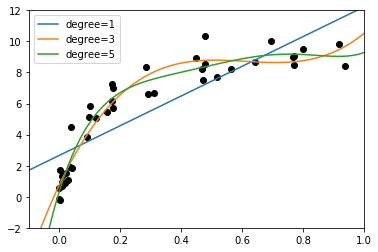

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
# import seaborn; seaborn.set()  # plot formatting

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

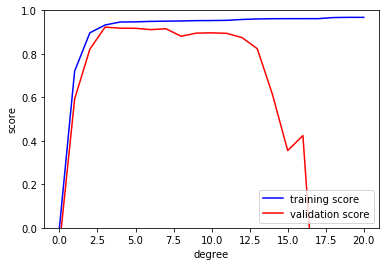

In [4]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

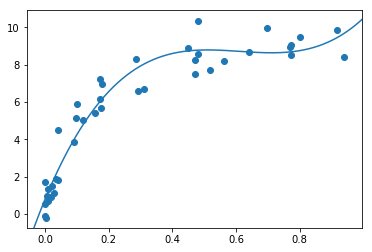

In [5]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

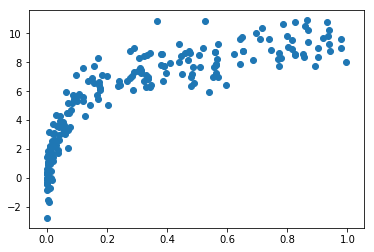

In [6]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2);

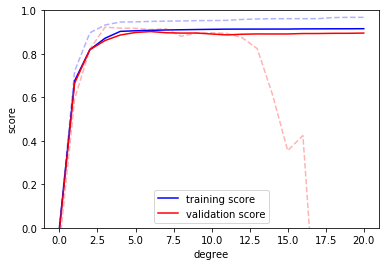

In [7]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
                                            'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score2, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3, linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

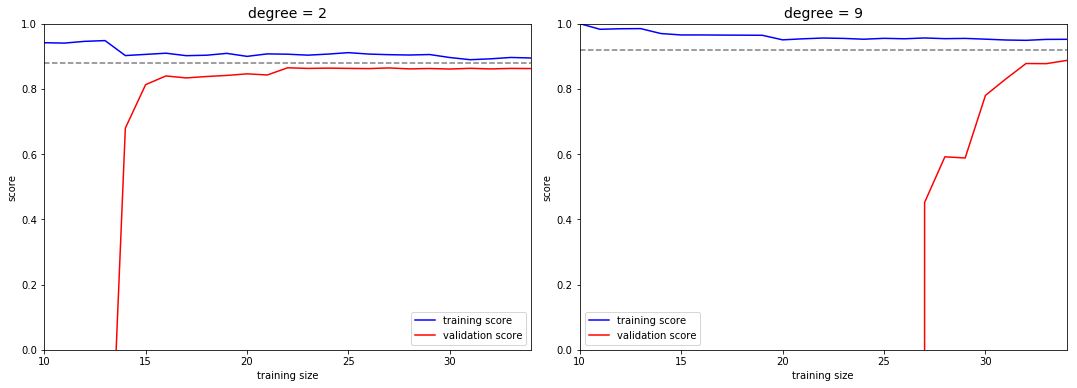

In [8]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))

    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

# GridSearchCV

In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)
# PolynomialRegression().get_params().keys()

dict_keys(['memory', 'steps', 'polynomialfeatures', 'linearregression', 'polynomialfeatures__degree', 'polynomialfeatures__include_bias', 'polynomialfeatures__interaction_only', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__normalize'])

In [10]:
grid.fit(X, y);

In [11]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

In [12]:
grid.best_score_

0.89569386911061444

In [13]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid.cv_results_)
results.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_linearregression__fit_intercept,param_linearregression__normalize,param_polynomialfeatures__degree,params,rank_test_score,split0_test_score,...,split4_test_score,split4_train_score,split5_test_score,split5_train_score,split6_test_score,split6_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.000833,0.000388,-0.149853,0.000000,True,True,0,"{'linearregression__fit_intercept': True, 'lin...",37,-0.602466,...,-0.043421,0.000000,-0.219189,0.000000,-0.094565,0.000000,0.000390,0.000269,0.201172,0.000000
1,0.000590,0.000256,0.638718,0.725263,True,True,1,"{'linearregression__fit_intercept': True, 'lin...",33,0.592417,...,0.765085,0.697995,0.523538,0.743513,0.797401,0.711044,0.000156,0.000044,0.124999,0.018239
2,0.000429,0.000222,0.865024,0.894642,True,True,2,"{'linearregression__fit_intercept': True, 'lin...",27,0.821356,...,0.934238,0.876857,0.807794,0.901064,0.803378,0.904203,0.000039,0.000006,0.062175,0.009693
3,0.000439,0.000257,0.884092,0.934021,True,True,3,"{'linearregression__fit_intercept': True, 'lin...",16,0.922981,...,0.967829,0.919196,0.954963,0.926735,0.869251,0.940288,0.000012,0.000053,0.081196,0.010628
4,0.000445,0.000238,0.895694,0.945891,True,True,4,"{'linearregression__fit_intercept': True, 'lin...",3,0.954819,...,0.966332,0.934251,0.939547,0.941481,0.918082,0.946416,0.000011,0.000006,0.069097,0.008667


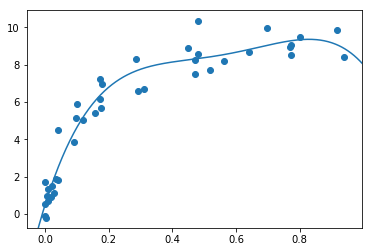

In [14]:
model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

In [17]:
from sklearn.svm import SVC
SVC().get_params().keys()

dict_keys(['C', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [18]:
from sklearn.linear_model import Ridge
Ridge().get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol'])